In [1]:
__author__ = "@Tssp"
__date__   = "04/01/2021"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(7190/4993)

1.2000066759945147

In [6]:
print(os.getcwd())
folder_path = "Simulations/ix7190_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [7]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix7190_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70300', '.70400', '.70405', '.70410', '.70415', '.70420', '.70425', '.70430', '.70435', '.70440', '.70445', '.70450', '.70455', '.70460', '.70465', '.70470', '.70475', '.70480', '.70485', '.70490', '.70495', '.70500', '.70505', '.70510', '.70515', '.70520', '.70525', '.70530', '.70535', '.70540', '.70545', '.70550', '.70555', '.70560', '.70565', '.70570', '.70575', '.70580', '.70585', '.70590', '.70595', '.70600', '.70605', '.70610', '.70615', '.70620', '.70625', '.70630', '.70635', '.70640', '.70645', '.70650', '.70655', '.70660', '.70665', '.70670', '.70675', '.70680', '.70685', '.70690', '.70695', '.70700', '.70705', '.70710', '.70715', '.70720', '.70725', '.70730', '.70735', '.70740', '.70745', '.70750', '.70755', '.70760', '.70765', '.707666', '.70770', '.70775', '.70780', '.70785', '.707891', '.70790', '.

In [8]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [9]:
dic = transpose_energies(Data)

In [10]:
least_bound_pos = 2900

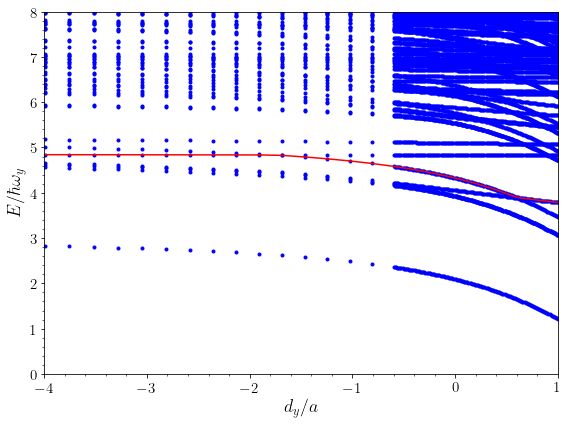

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_2904']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(-4, 1)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()
fig.savefig('Results/Figures/Ix7190_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

## Resonance x=0

2901
2902
2903


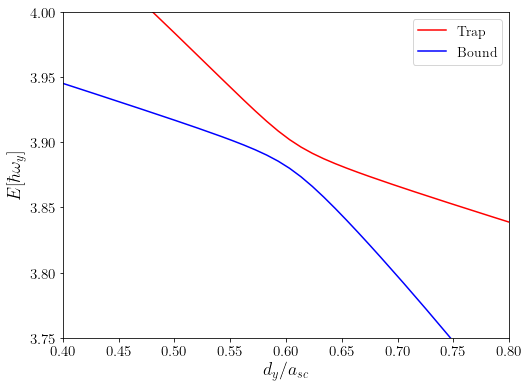

In [28]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_2904']/wy, 'r', label='trap')
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b', label='Data')
ax2.vlines(x[-100], 3.6, 4.3, alpha=0.5, linestyles='--')
ax2.vlines(x[-160], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.set_ylim(3.75, 4.0)
ax2.set_xlim(0.40, 0.80)
ax2.set_xlabel('$d_{y}/a_{sc}$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [19]:
print(f'''To find the eigenstates:
x={x[-100]}, delta=0{delta[-100]}, 2903: trap(2) bound(0,0,0), 2904: trap(1) bound(2,0,0)
x={x[-150]}, delta=0{delta[-150]}, 2903: trap(b) bound(2,0,0), 2904: trap(1) bound(0,0,0)''')

To find the eigenstates:
x=0.23307456890054473, delta=0.71405, 2903: trap(2) bound(0,0,0), 2904: trap(1) bound(2,0,0)
x=0.745878134345502, delta=0.71155, 2903: trap(b) bound(2,0,0), 2904: trap(1) bound(0,0,0)


In [29]:
%matplotlib

Using matplotlib backend: MacOSX


In [30]:
# 2903
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+1, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax2.set_ylim(3.75, 4.0)
ax2.set_xlim(0.40, 0.80)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 35:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [31]:
# 2904
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+1, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax2.set_ylim(3.75, 4.0)
ax2.set_xlim(0.40, 0.80)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord2 = []
ycoord2 = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord2, ycoord2
    xcoord2.append(ix)
    ycoord2.append(iy)
    if len(xcoord2) == 35:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord2}\n ycoord: {ycoord2}')
    return xcoord2, ycoord2
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [32]:
%matplotlib inline

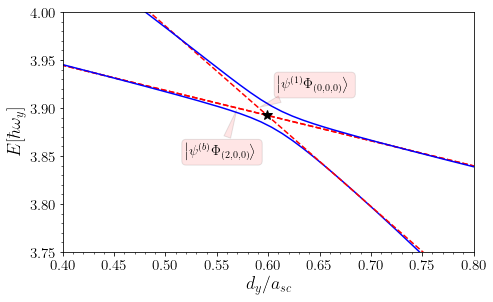

In [54]:
fig3, ax3 = plt.subplots(figsize=aursize)

# nivel 2901:
ax3.plot(x, dic['nivel_2901']/wy, 'b')

# nivel 2902:
ax3.plot(x, dic['nivel_2902']/wy, 'b')

# nivel 2903:
f2903 = np.polyfit(xcoord, ycoord, deg=1)
x2903 = np.linspace(-1, 1, num=40)
ax3.plot(x2903, np.polyval(f2903, x2903), 'r--', markersize=4, label='Diabetic')
ax3.plot(x2903, np.polyval(f2903, x2903), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_2903']/wy, 'b')

# nivel 2904:
f2904 = np.polyfit(xcoord2, ycoord2, deg=1)
x2904 = np.linspace(-1, 1, num=40)
ax3.plot(x2904, np.polyval(f2904, x2904), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_2904']/wy, 'b', label='Adiabatic')

# Crosses:
##########
ax3.plot(cross_points(f2903, f2904), np.polyval(f2904, cross_points(f2903, f2904)), 'k*', markersize=10, label='ICIR')

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(0.59, 3.90), xytext=(0.61, 3.92), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(0.57, 3.90), xytext=(0.52, 3.85), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E$[$\hbar \omega_{y}$]')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.75, 4.0)
ax3.set_xlim(0.40, 0.80)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()
fig3.savefig('Results/Figures/Ix7190_Iy4993_Iz4993_Easc_Interpolation_Emergent.png', bbox_inches="tight", dpi=200)

In [34]:
print(f'''Crosses between (x, E):
* 2903-2904: ({cross_points(f2903, f2904)}, {np.polyval(f2904, cross_points(f2903, f2904))})''')

Crosses between (x, E):
* 2903-2904: (0.5990677193900867, 3.8923095667741623)


In [35]:
print(f'''ICIR: asc/dy:
* 2903-2904: {1/cross_points(f2904, f2903)}''')

ICIR: asc/dy:
* 2903-2904: 1.6692603651188282
